<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [133]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Veamos información sobre el dataset

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

Podemos ver que hay 31 columnas en este dataset, 30 de ellas siendo de tipo `float64` y una de ellas siendo `diagnosis`, que es la variable que nos interesa predecir. Estas 30 columnas consisten en 10 tipos de medición distintas de los tumores, donde a cada uno se le asignan 3 columnas distintas representando distintas medidas estadísticas.

Además, este dataframe no posee datos nulos, por lo que no es necesario a priori modificar o corregir ciertos datos.

Hagamos una visualización del comportamiento de los datos en cada variable para identificar rápidamente valores atípicos.

,0
diagnosis,"Axes(0.125,0.77;0.110714x0.11)"
radius_mean,"Axes(0.257857,0.77;0.110714x0.11)"
texture_mean,"Axes(0.390714,0.77;0.110714x0.11)"
perimeter_mean,"Axes(0.523571,0.77;0.110714x0.11)"
area_mean,"Axes(0.656429,0.77;0.110714x0.11)"
smoothness_mean,"Axes(0.789286,0.77;0.110714x0.11)"
compactness_mean,"Axes(0.125,0.638;0.110714x0.11)"
concavity_mean,"Axes(0.257857,0.638;0.110714x0.11)"
concave points_mean,"Axes(0.390714,0.638;0.110714x0.11)"
symmetry_mean,"Axes(0.523571,0.638;0.110714x0.11)"


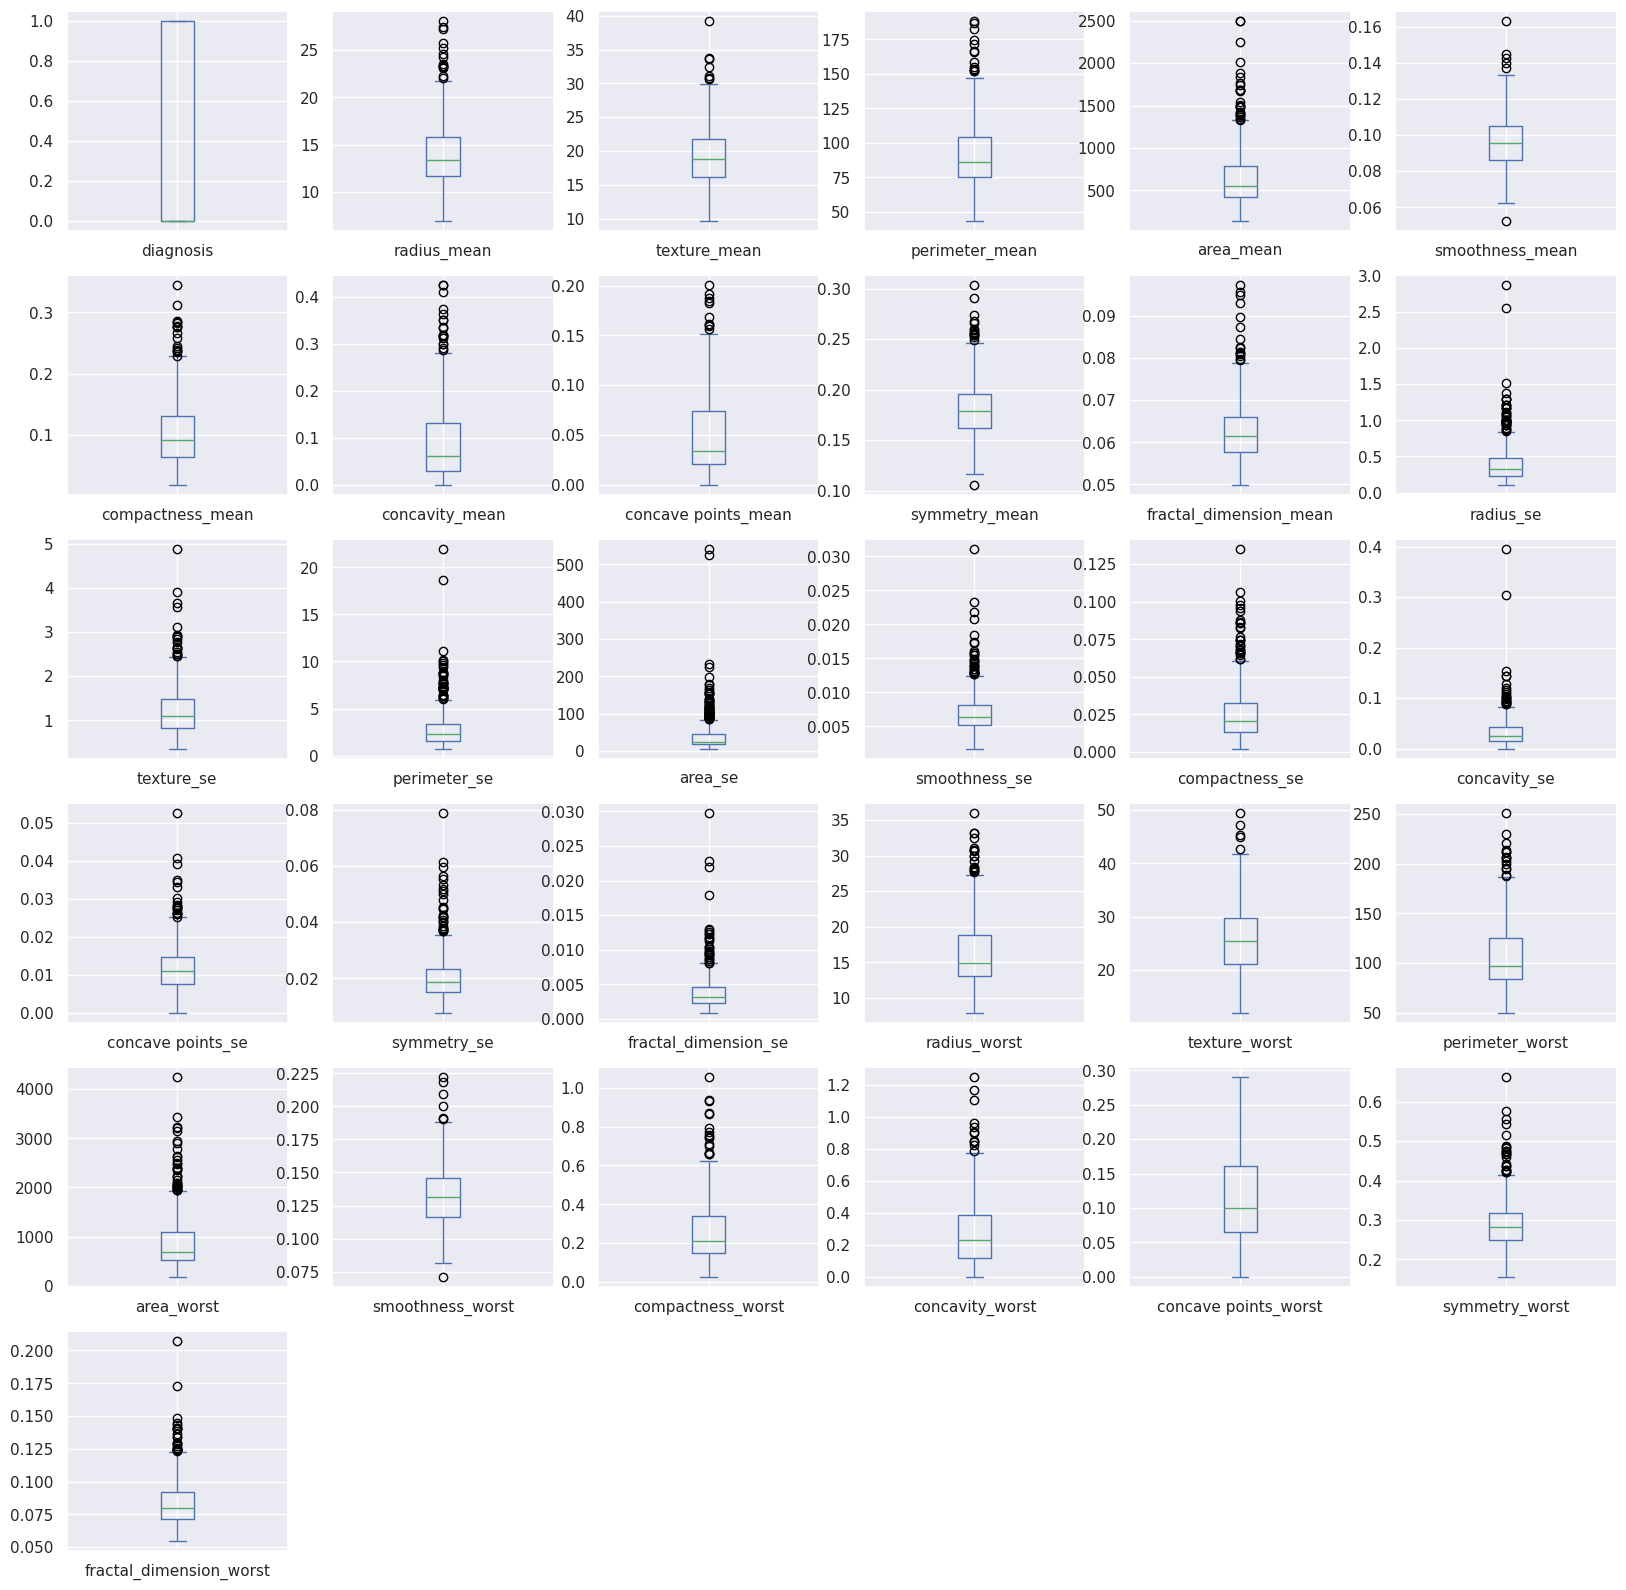

In [135]:
df.plot(kind='box', subplots=True, layout=(6, 6), figsize=(20, 20), sharey=False)

Podemos ver que en algunas columnas hay valores muy lejanos a la media comparado con la desviación estandar del dataset. Creemos un filtro de datos que se desvían más de 4 desviaciones estandar de la media, sin considerar la columna `diagnosis`.

In [136]:
df_columns=df.columns
filter=df.copy()

for column in df_columns:
    if column!='diagnosis':
        filter[column] = (df[column]-df[column].mean())/df[column].std()
        filter[column] = np.where(filter[column]>4,False,True)
    else:
        filter[column]=True

filter.shape[0]-filter.sum()

,0
diagnosis,0
radius_mean,0
texture_mean,1
perimeter_mean,0
area_mean,3
smoothness_mean,1
compactness_mean,1
concavity_mean,3
concave points_mean,0
symmetry_mean,1


Podemos ver que capturó ciertos datos, realizemos el filtro deseado y veamos como cambia la visualización anterior.

,0
diagnosis,"Axes(0.125,0.77;0.110714x0.11)"
radius_mean,"Axes(0.257857,0.77;0.110714x0.11)"
texture_mean,"Axes(0.390714,0.77;0.110714x0.11)"
perimeter_mean,"Axes(0.523571,0.77;0.110714x0.11)"
area_mean,"Axes(0.656429,0.77;0.110714x0.11)"
smoothness_mean,"Axes(0.789286,0.77;0.110714x0.11)"
compactness_mean,"Axes(0.125,0.638;0.110714x0.11)"
concavity_mean,"Axes(0.257857,0.638;0.110714x0.11)"
concave points_mean,"Axes(0.390714,0.638;0.110714x0.11)"
symmetry_mean,"Axes(0.523571,0.638;0.110714x0.11)"


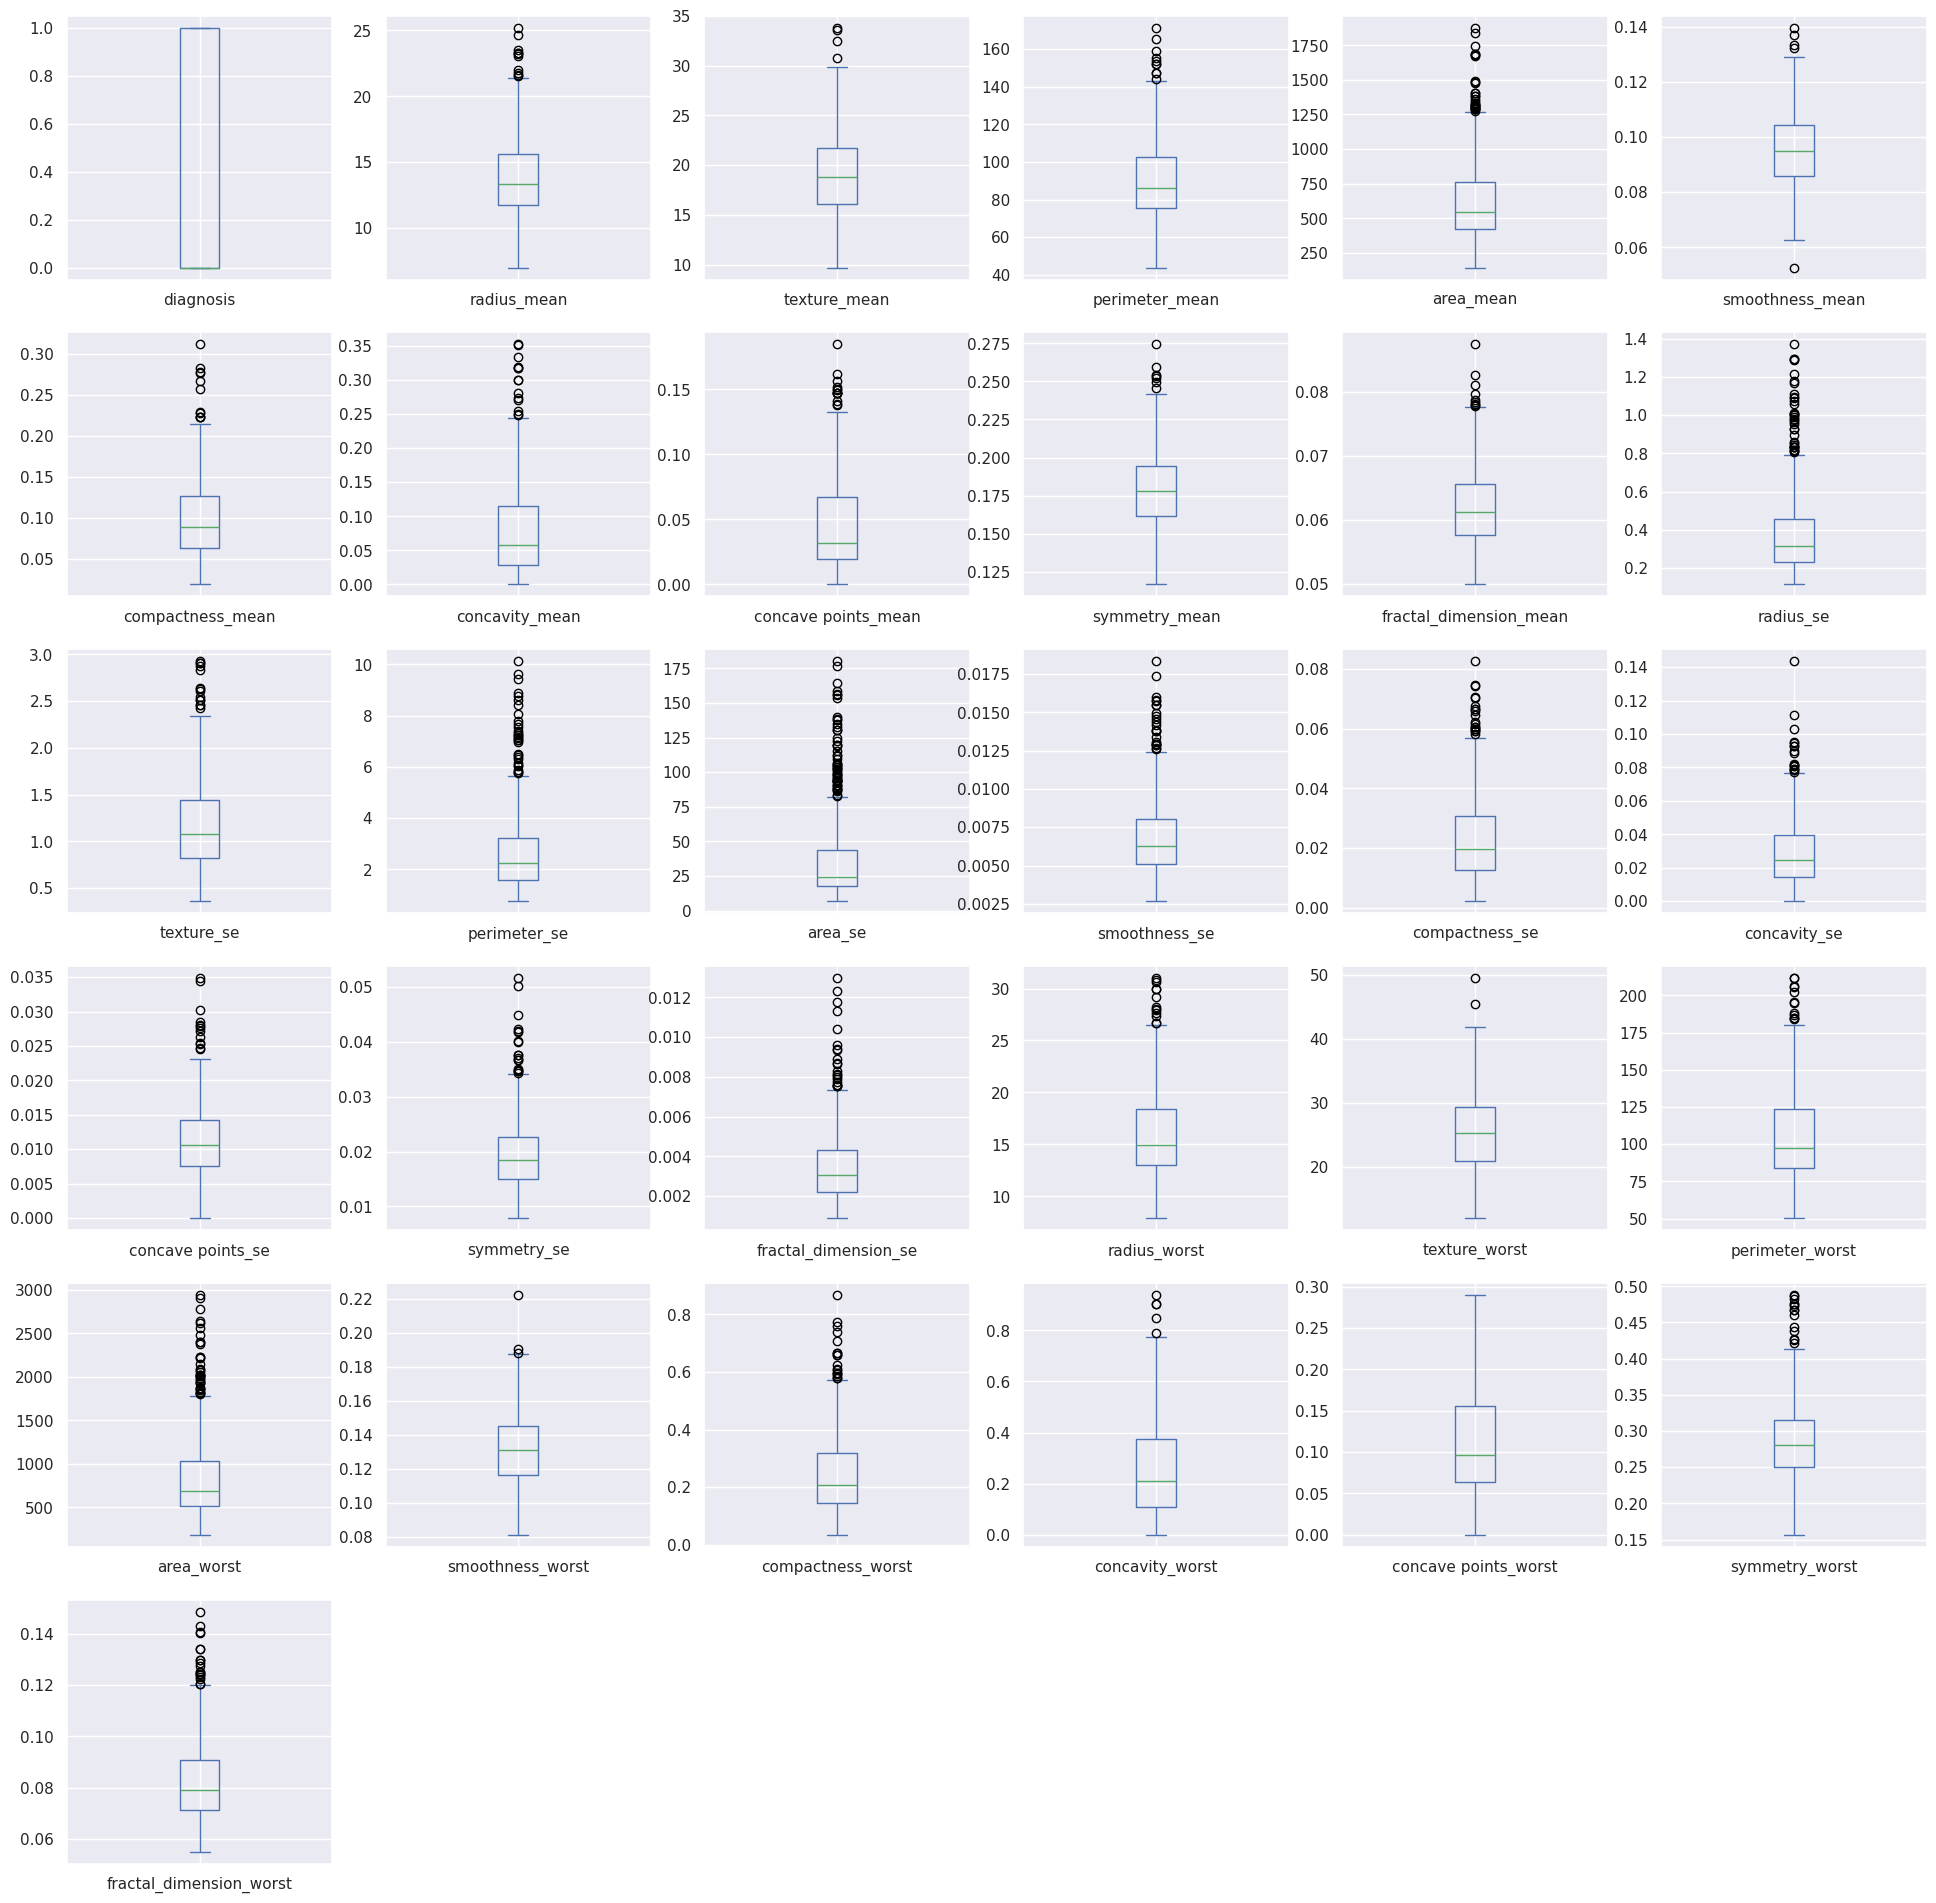

In [137]:
df_filter=pd.DataFrame()
df_filter=df[filter].dropna().reset_index(drop=True)
df_filter.plot(kind='box', subplots=True, layout=(6, 6), figsize=(24, 24), sharey=False)

Veamos la propoción de datos quitados al aplicar el filtro.

In [138]:
(df.shape[0]-df_filter.shape[0])/df.shape[0]

0.05975395430579965

Vemos que los datos outlier que quitamos mediante el procedimiento son cercanos al 6% de los datos originales del dataframe, lo que es razonable. Veamos con estos datos la correlación entre las variables.

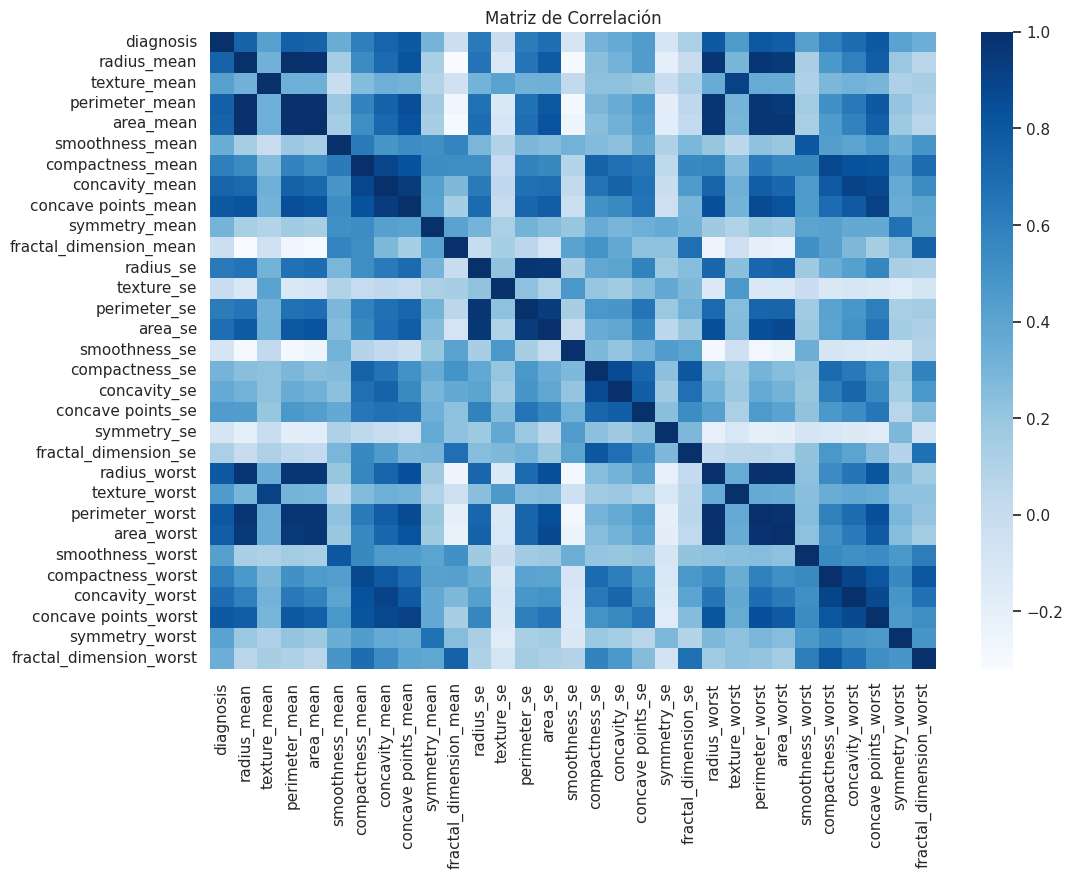

In [139]:
sns.heatmap(df_filter.corr(), cmap='Blues', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Podemos ver que en general las columnas tienen correlación positiva entre sí, y las correlaciones negativas presentes tienen magnitud baja.

Ahora, visualicemos la diferencia entre las características entre tumores benignos y malignos. Realicemos un boxplot donde solapamos las características principales de cada uno. Recordemos que la variable `diagnosis` es 0 para tumores benignos y 1 para valores malignos.

,0
area_mean,"Axes(0.125,0.77;0.133621x0.11)"
area_se,"Axes(0.285345,0.77;0.133621x0.11)"
area_worst,"Axes(0.44569,0.77;0.133621x0.11)"
compactness_mean,"Axes(0.606034,0.77;0.133621x0.11)"
compactness_se,"Axes(0.766379,0.77;0.133621x0.11)"
compactness_worst,"Axes(0.125,0.638;0.133621x0.11)"
concave points_mean,"Axes(0.285345,0.638;0.133621x0.11)"
concave points_se,"Axes(0.44569,0.638;0.133621x0.11)"
concave points_worst,"Axes(0.606034,0.638;0.133621x0.11)"
concavity_mean,"Axes(0.766379,0.638;0.133621x0.11)"


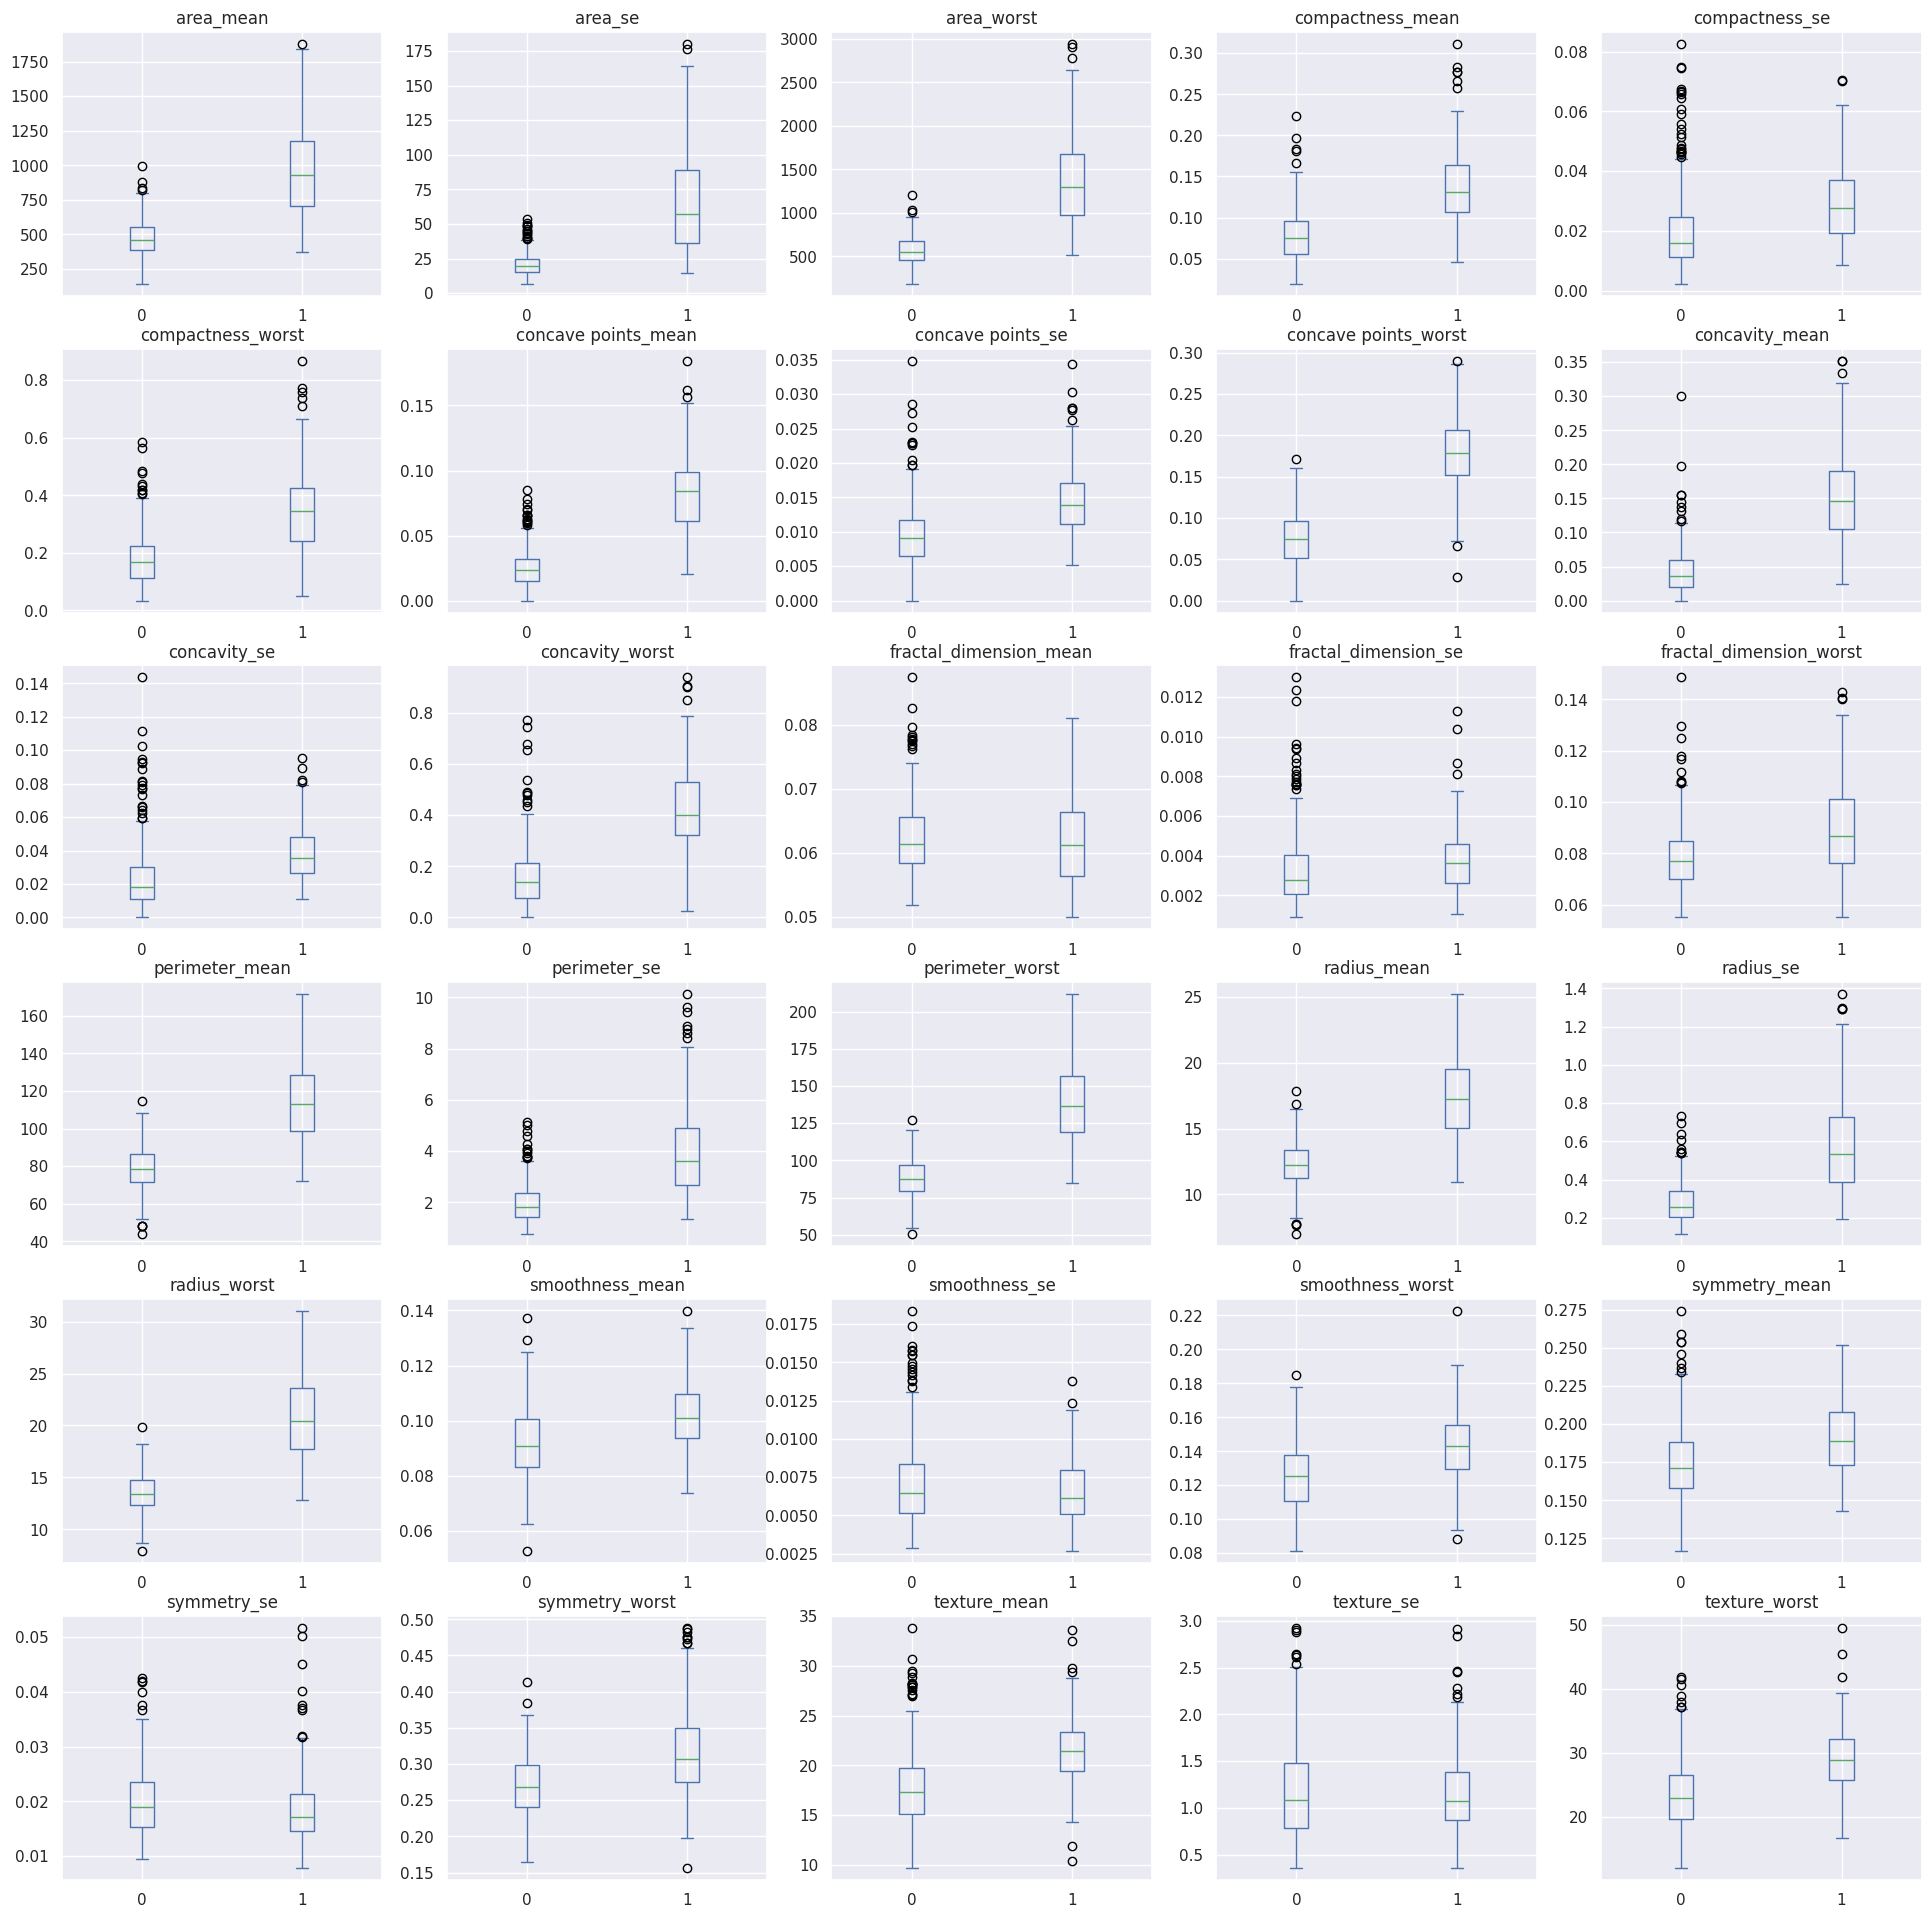

In [140]:
df_filter.plot(kind='box', by='diagnosis', subplots=True, layout=(6, 5), figsize=(24, 24), sharey=False)

Podemos ver que en general los tumores malignos presentan valores más altos que los tumores benignos en casi toda categoría. Además, hay varias categorías en las cuales los valores outlier de los tumores benignos no superan (o estan muy cerca de) la media de los tumores malignos. Las variables que más muestran este fenómeno son `area_mean`, `area_se`, `area_worst`, `concave points_mean`, `concave points_worst`, `perimeter_mean`, `perimeter_worst`, `radius_mean` y `radius_worst`. Esto indica posiblemente que las variables anteriores tengan la mayor capacidad discriminativa.

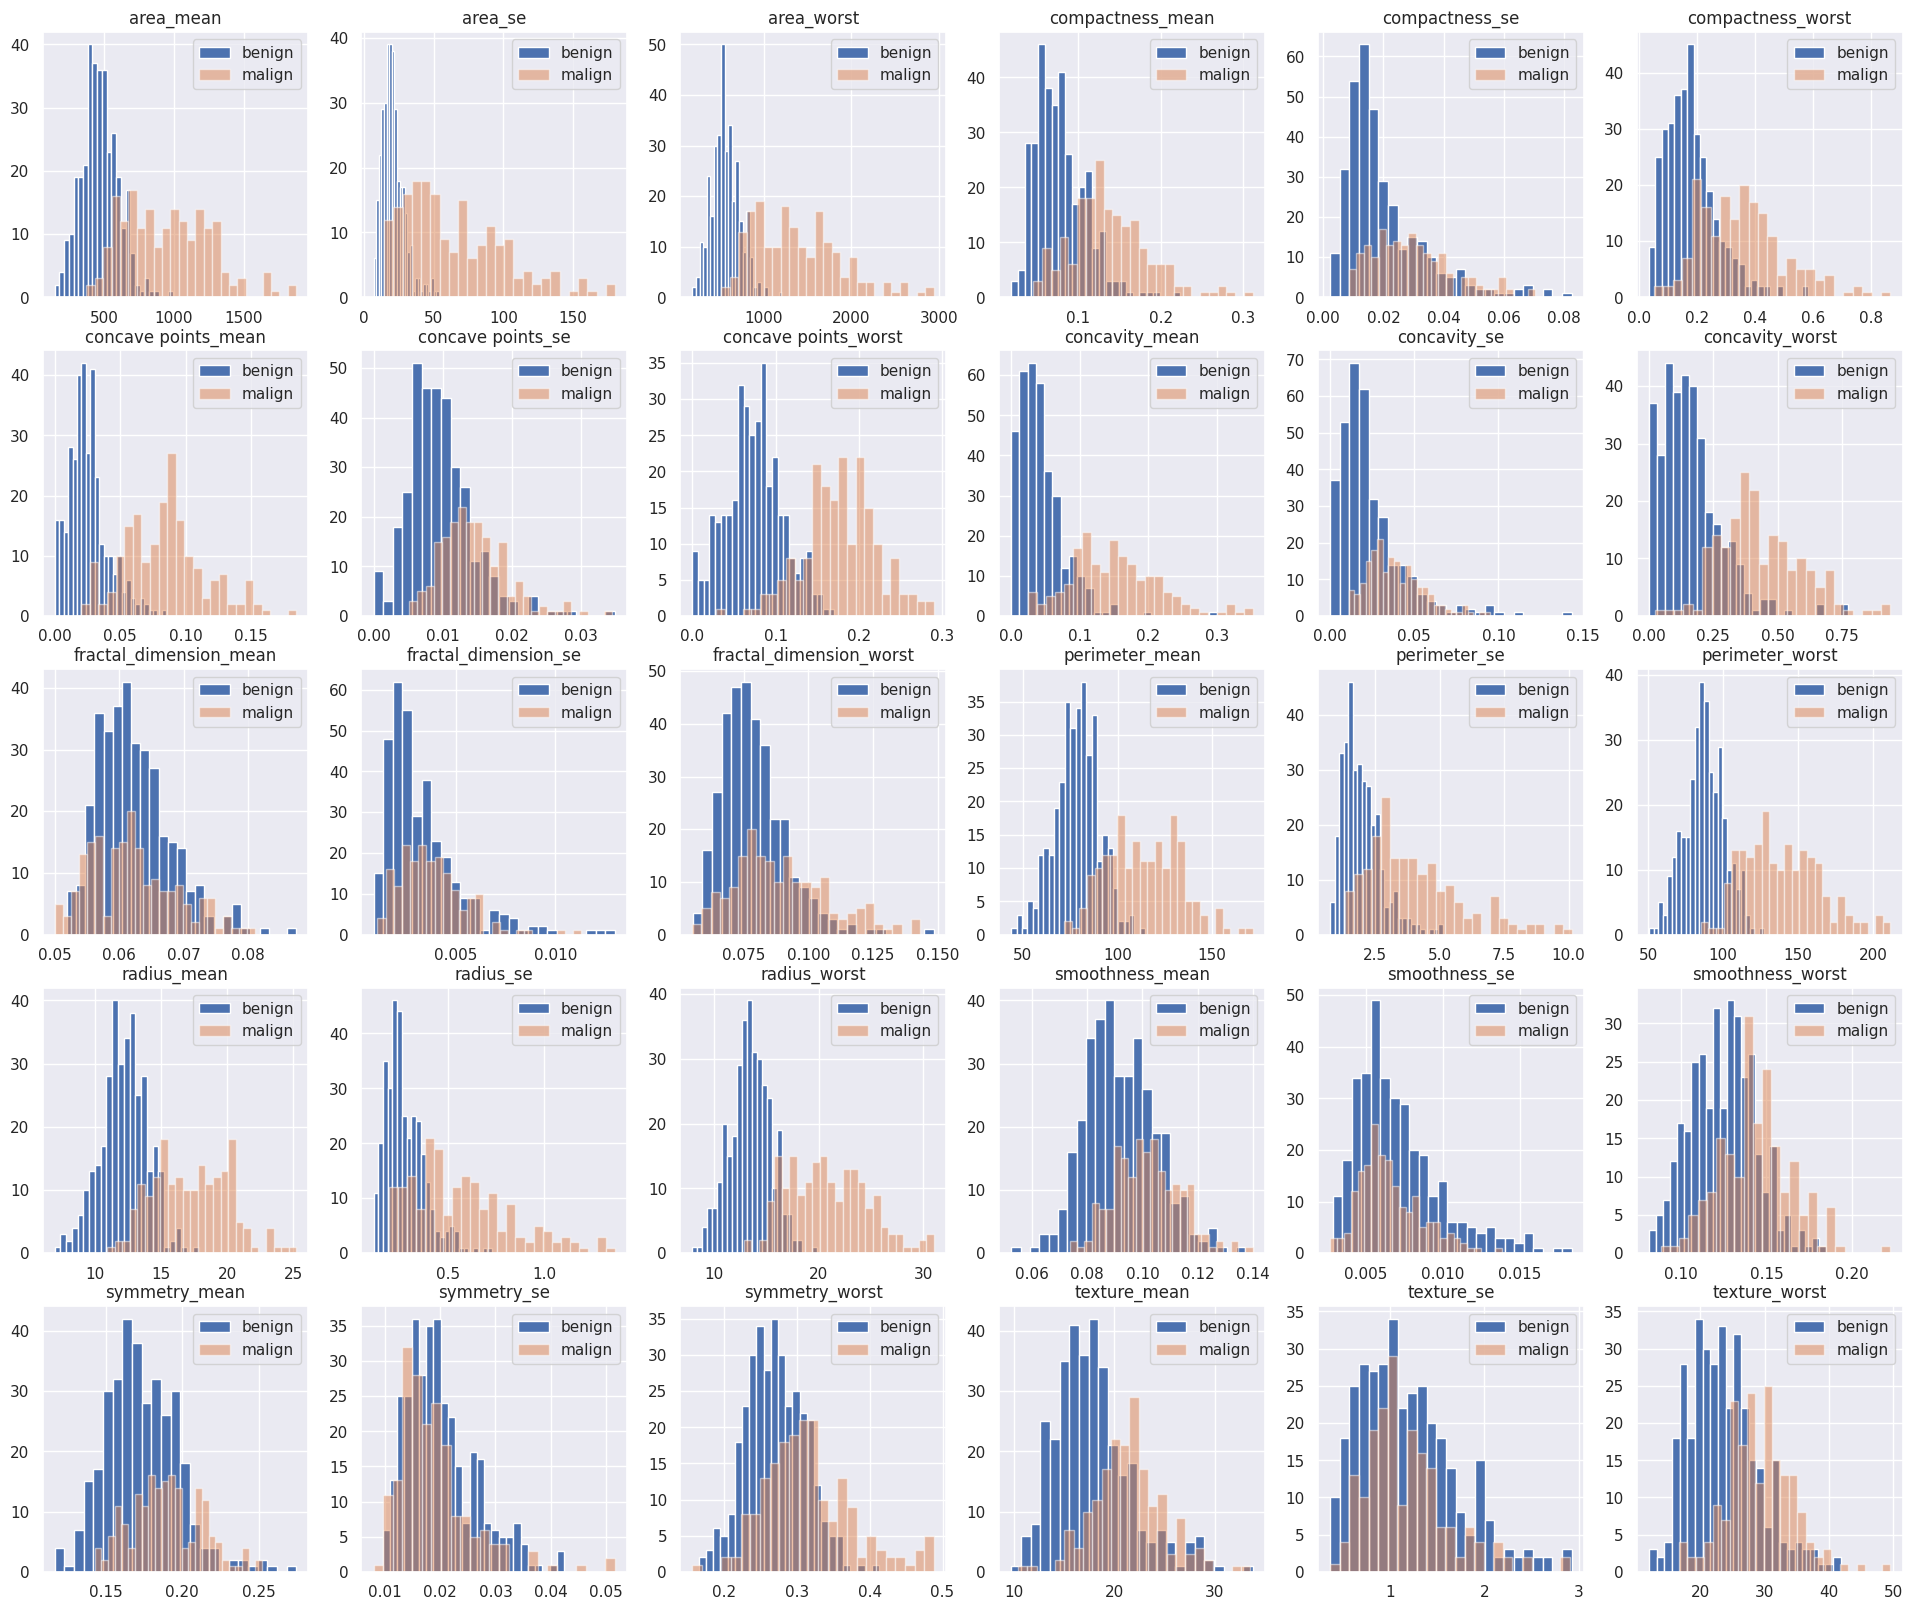

In [141]:
df_b=df_filter[df_filter['diagnosis']==0].drop('diagnosis',axis=1)
df_m=df_filter[df_filter['diagnosis']==1].drop('diagnosis',axis=1)
df_num_cols=df.columns.tolist()
df_num_cols.remove('diagnosis')
df_num_cols.sort()

fig,axs=plt.subplots(5,6,figsize=(24,20))

for i in range(5):
  for j in range(6):
    col=df_num_cols[6*i+j]
    df_b[col].hist(bins=25,ax=axs[i,j],label='benign')
    df_m[col].hist(bins=25,ax=axs[i,j],alpha=0.5,label='malign')
    axs[i,j].set_title(col)
    axs[i,j].legend()

plt.show()

Podemos ver más claramente lo mencionado anteriormente, y además visualizamos que las distribuciones tienden a ser similares en cada categoría no mencionada anteriormente. Veamos si encontramos algunas diferencias visibles con las matrices de correlación respectivas. Restemos la correlación entre las variables de los tumores malignos con los benignos y veamos que valores son más grandes/pequeños.

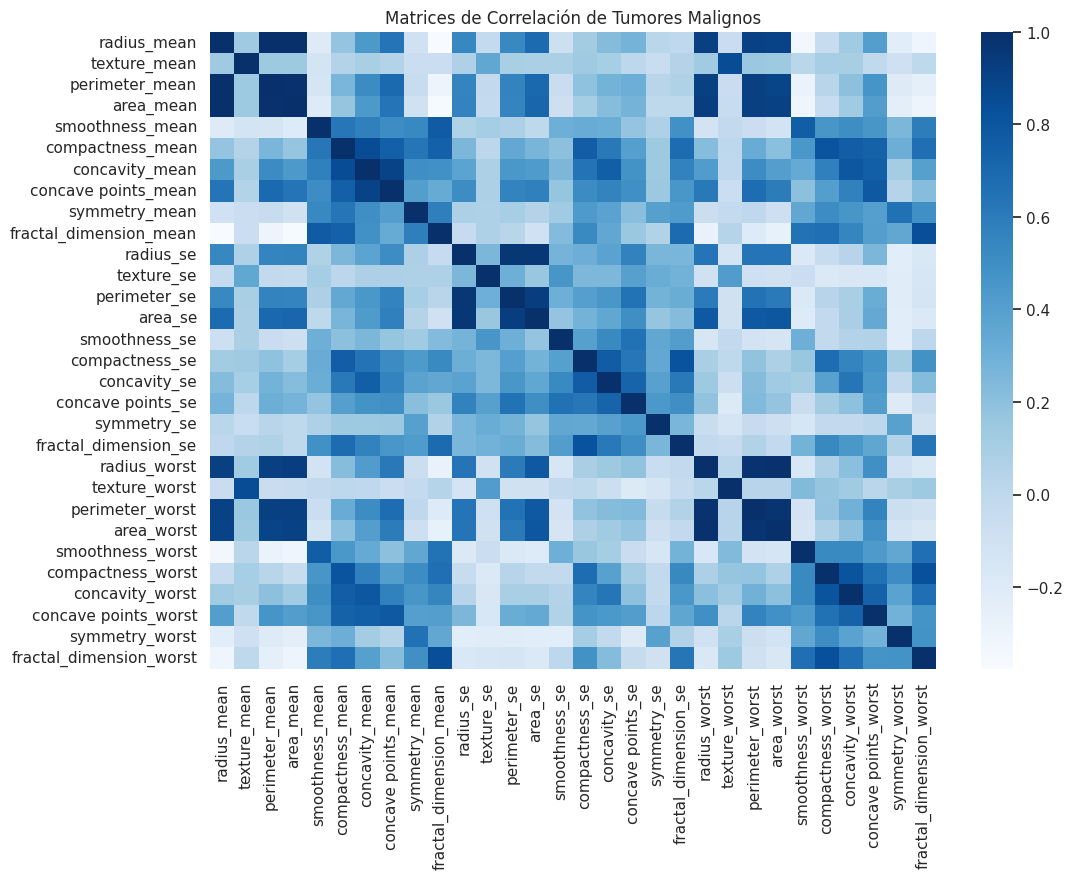

In [142]:
sns.heatmap(df_m.corr(), cmap='Blues', fmt=".2f")
plt.title('Matrices de Correlación de Tumores Malignos')
plt.show()

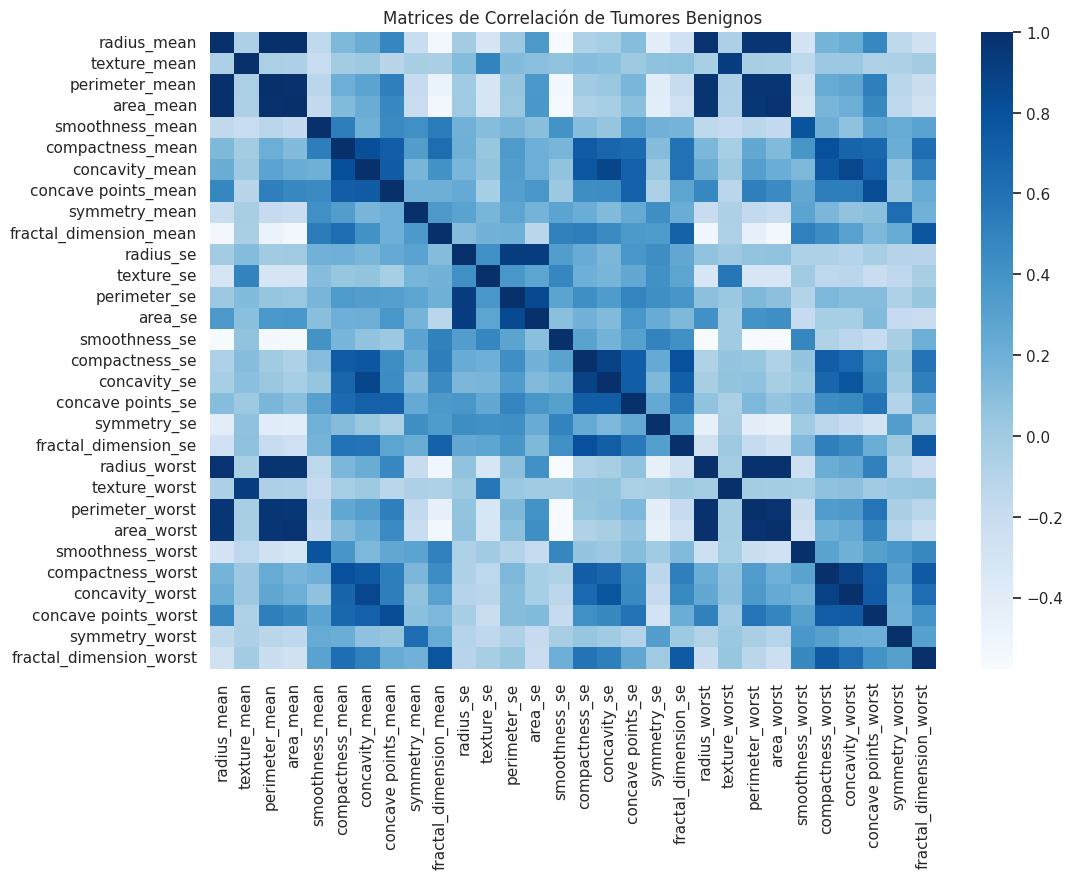

In [143]:
sns.heatmap(df_b.corr(), cmap='Blues', fmt=".2f")
plt.title('Matrices de Correlación de Tumores Benignos')
plt.show()

Podemos ver que ambas tablas de correlación son distintas, pero con la diferencia entre sus valores no siendo muy extremas. Se puede ver que las distintas estadísticas de cada medida tienen bastante alta correlación entre sí, y particularmente las medidas de `radius`, `perimeter` y `area` parecen tener bastante alta correlación entre sí, en las estadísticas `mean` y `worst`.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


Preparemos los datos reescalando las variables numéricas por columna (todas menos `diagnosis`) usando StandardScaler. Guardaremos los datos en una dataframe llamada `df_new`.

In [144]:
df_num=pd.DataFrame()
df_num=df_filter[df_num_cols]

df_num_scaled=pd.DataFrame(data=StandardScaler().fit_transform(df_num),columns=df_num_cols)

df_new=pd.concat([df_filter['diagnosis'],df_num_scaled],axis=1)
df_new.head()

,diagnosis,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
0,1,1.153737,3.752308,2.303373,3.787476,1.805719,3.006472,2.837634,0.857799,2.474834,...,2.068995,1.725668,-0.184672,1.397301,2.533882,1.575377,3.244801,-2.110606,-0.560537,-1.374736
1,1,2.189793,1.202712,2.178838,-0.444405,-0.733059,-0.402961,0.674521,0.392484,1.202190,...,1.982091,-0.819155,-0.640604,-0.361637,0.080401,-0.886147,-0.216746,-0.332735,-0.911493,-0.352432
2,1,1.797685,1.843968,1.690581,1.283996,1.171731,1.290367,2.297770,1.745100,2.115801,...,1.665668,1.060355,-0.281373,0.581960,1.119190,0.426971,1.397146,0.504476,-0.802971,0.004029
3,1,2.097345,1.857147,1.425696,0.707579,0.080960,-0.271993,1.634186,1.419191,0.825525,...,1.436150,0.357240,1.792458,0.261320,0.068275,-0.326432,-0.938603,-1.157917,-0.814438,-1.485709
4,1,-0.516385,-0.304480,-0.221727,1.498823,0.705064,2.004996,0.975945,0.010059,1.011453,...,-0.139279,2.436343,0.246794,2.171417,1.191945,0.297337,2.092822,-0.830731,-0.591455,-0.295264


Se puede considerar filtrar fuera de este dataset algunas columnas, por ejemplo las que presentan covarianza muy parecida entre cada columna. Esto es bastante presente para columnas del mismo tipo de medida pero distinta estadística, pero no en todas. No se realizará un cambio debido a lo que hará en los siguientes pasos, donde identificaremos las componentes principales del dataset y esto naturalmente filtrará distintas columnas.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Intentemos hacer PCA sobre este dataset. Realicemos lo mismo que hemos hecho en los laboratorios anteriores.

Text(0.5, 1.0, 'Porcentaje de varianza explicada por cada componente')

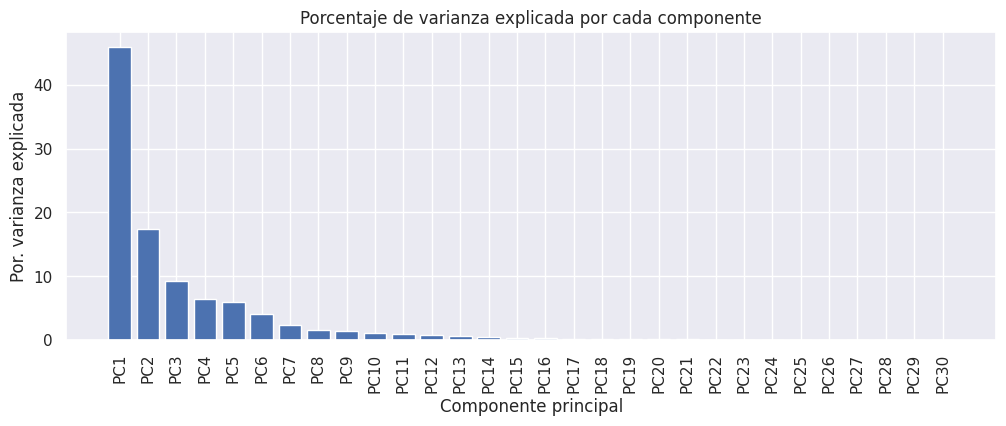

In [145]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())

pc = [f"{'PC'}{i+1}" for i in range(30)]
X=df_new.drop(columns='diagnosis')
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Se combierte el array a dataframe para añadir nombres a los ejes.
df_pca=pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X.columns,
    index   = pc
)

# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)

plt.figure(figsize=(12,4))
plt.bar(x=range(1,31), height=percent_variance, tick_label=pc)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('Componente principal')
plt.ylabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')

Podemos ver que desde la 15ava componente principal el porcentaje de varianza explicada es imperceptible. Veamos la varianza acumulada y cortes en el 90% y 95% de varianza explicada total.

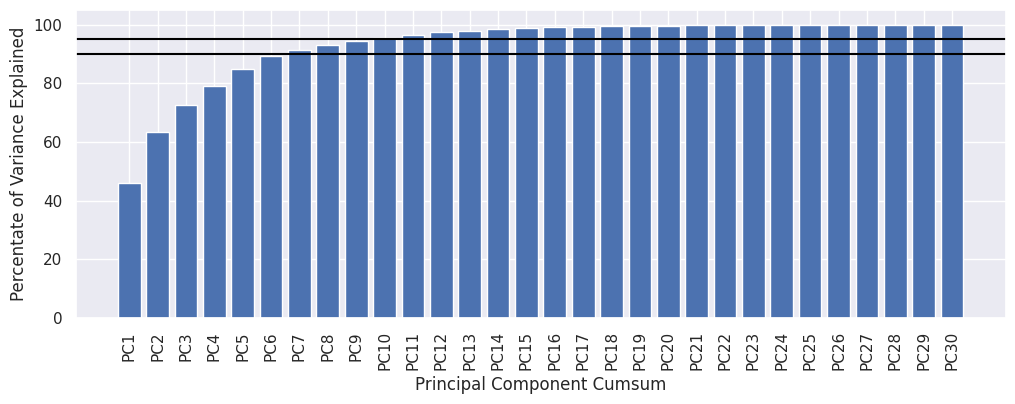

In [146]:
percent_variance_cum = np.cumsum(percent_variance)

plt.figure(figsize=(12,4))
plt.bar(x= range(1,31), height=percent_variance_cum, tick_label=pc)
plt.axhline(y=90,color='black')
plt.axhline(y=95,color='black')
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

Podemos ver que podemos considerar solamente las primeras 8 componentes principales para obtener el 90% de la varianza explicada, y 11 componentes principales son suficientes para explicar el 95% de la varianza explicada. Veamos el gráfico de las primeras dos y tres componentes principales de este dataset a ver que tan bueno es el clustering obtenido mediante este método.

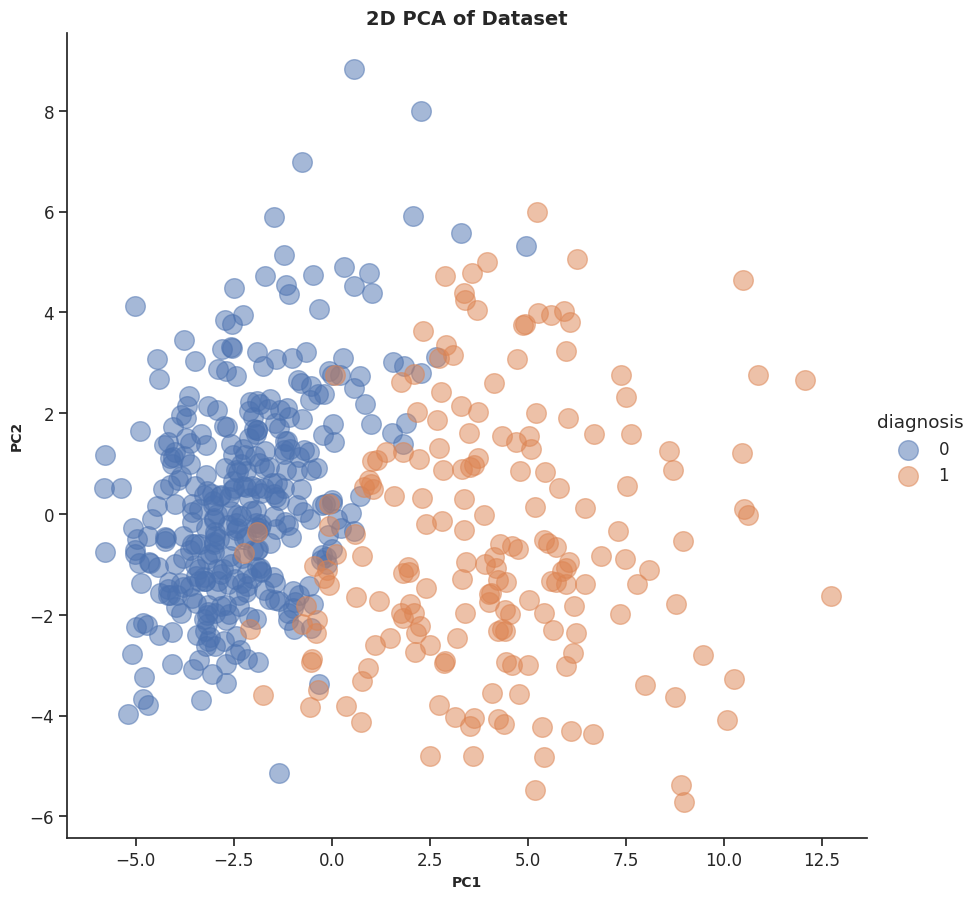

In [147]:
X_scaled=df_new.drop(columns='diagnosis')
y=df_new['diagnosis']

# PCA con 2 componentes
embedding = PCA(n_components=2)
X_PC2 = embedding.fit_transform(X_scaled)

df_pca2=pd.DataFrame(X_PC2,columns = ['PC1','PC2'])
df_pca2['diagnosis'] = y

# Plot Digits PCA
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='PC1',
           y='PC2',
           data=df_pca2,
           fit_reg=False,
           legend=True,
           height=9,
           hue='diagnosis',
           scatter_kws={"s":200, "alpha":0.5})

plt.title('2D PCA of Dataset', weight='bold').set_fontsize('14')
plt.xlabel('PC1', weight='bold').set_fontsize('10')
plt.ylabel('PC2', weight='bold').set_fontsize('10')

Podemos ver que no separa muy bien los dataset, aunque los datos parecen estar mas menos bien separados por una recta. Veamos con tres componentes principales.

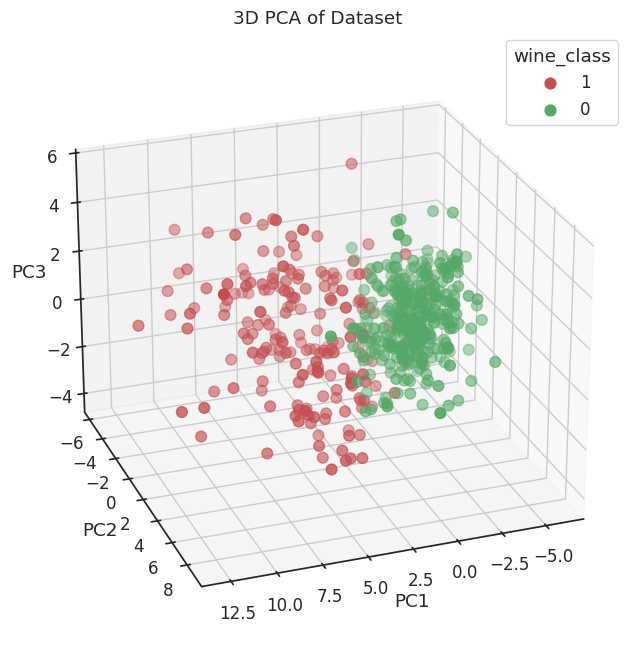

In [148]:
# PCA con 2 componentes

embedding = PCA(n_components=3)
X_PC3 = embedding.fit_transform(X_scaled)

df_pca3 = pd.DataFrame(X_PC3,columns = ['PC1','PC2','PC3'])
df_pca3['diagnosis'] = y

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each target group with a different color
colors = ['r', 'g', 'b'] # Define colors for each target class
for target_name, color in zip(df_new['diagnosis'].unique(), colors):
    indices_to_plot = df_pca3['diagnosis'] == target_name
    ax.scatter(df_pca3.loc[indices_to_plot, 'PC1'],
               df_pca3.loc[indices_to_plot, 'PC2'],
               df_pca3.loc[indices_to_plot, 'PC3'],
               c=color,
               s=60,
               label=target_name)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA of Dataset')
ax.view_init(elev=25, azim=70)
ax.legend(title='wine_class')
plt.show()


Podemos ver que está ligeramente mejor definido pero sin lograr separar muy bien la frontera problemática que vimos en el gráfico 2D.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


Entrenemos los primeros tres modelos puestos en el ejemplo anterior, e inmediatemente realizemos una optimización de hiperparámetros para cada una. Se utilizará gridsearch para entrenar todos los modelos, y se escogerá el mejor estimador de cada modelo con respecto a la precisión. Se calculará la matriz de confusión y AUC-ROC para los mejores hiperparámetros encontrados por modelo. Para esto, consideraremos el dataset reducido a sus primeras 8 componentes principales, dado lo visto en la parte anterior.

In [149]:
# Separar en conjunto de testeo y entrenamiento

X_init=PCA(n_components=8).fit_transform(df_new.drop(columns='diagnosis'))
y_init=df_new['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X_init, y_init, test_size=0.2,random_state=2)

# Preparacion para el entrenamiento
hiperparam_lr={'solver': ['lbfgs','liblinear','newton-cg'],'fit_intercept': [True,False]}
hiperparam_svm={'C': [0.01,0.1,1,10,100],'kernel': ['linear','sigmoid']}
hiperparam_rf={'n_estimators': [50,100,200],'max_features': ['log2','sqrt']}

# Entrenamiento mediante gridsearch de cada modelo

grid_search_lr = GridSearchCV(LogisticRegression(max_iter=10000), hiperparam_lr, cv=5, scoring='precision')
grid_search_svc = GridSearchCV(SVC(probability=True), hiperparam_svm, cv=5, scoring='precision')
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=1), hiperparam_rf, cv=5, scoring='precision')

grid_search_lr.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Eleccion de mejor modelo
best_lr = grid_search_lr.best_estimator_
best_svc = grid_search_svc.best_estimator_
best_rf = grid_search_rf.best_estimator_

Veamos los parámetros de los mejores modelos encontrados.

In [150]:
grid_search_lr.best_params_

{'fit_intercept': True, 'solver': 'lbfgs'}

In [151]:
grid_search_svc.best_params_

{'C': 0.01, 'kernel': 'sigmoid'}

In [152]:
grid_search_rf.best_params_

{'max_features': 'log2', 'n_estimators': 200}

Comparemos sus métricas.

In [153]:
def metrics(y_test,y_cl,model,param):
  data_columns=['classifier','hyperparameters','accuracy_score','precision_score','recall_score','f1_score']

  data=[[0 for _ in range(6)] for _ in range(1)]
  data[0][0]=model
  data[0][1]=param
  data[0][2]=accuracy_score(y_test,y_cl)
  data[0][3]=precision_score(y_test,y_cl,average='macro')
  data[0][4]=recall_score(y_test,y_cl,average='macro')
  data[0][5]=f1_score(y_test,y_cl,average='macro')

  return pd.DataFrame(data=data,columns=data_columns)

y_lr_pred = best_lr.predict(X_test)
df_lr = metrics(y_test,y_lr_pred,'logistic_regression',grid_search_lr.best_params_)

y_svc_pred = best_svc.predict(X_test)
df_svc = metrics(y_test,y_svc_pred,'svc',grid_search_svc.best_params_)

y_rf_pred = best_rf.predict(X_test)
df_rf = metrics(y_test,y_rf_pred,'random_forest',grid_search_rf.best_params_)

df_metrics = pd.concat([df_lr, df_svc, df_rf], ignore_index=True)
df_metrics


,classifier,hyperparameters,accuracy_score,precision_score,recall_score,f1_score
0,logistic_regression,"{'fit_intercept': True, 'solver': 'lbfgs'}",0.981308,0.975000,0.985507,0.979827
1,svc,"{'C': 0.01, 'kernel': 'sigmoid'}",0.915888,0.931239,0.887490,0.903748
2,random_forest,"{'max_features': 'log2', 'n_estimators': 200}",0.953271,0.951544,0.946034,0.948681


Podemos ver que la regresión logística tiene el mejor desempeño de métricas de los modelos probados anteriormente. Hagamos validación cruzada y veamos como puede cambiar la precisión de estos modelos.

In [154]:
# Librerías necesarias
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Configuración de validación cruzada con 20 pliegues estratificados
skf = StratifiedKFold(n_splits=20)

In [155]:
scores_lr = cross_val_score(best_lr, X, y, cv=skf, scoring='accuracy')

# Resultados
for i, score in enumerate(scores_lr, 1):
    print(f'Pliegue {i}: Precisión = {score:.3f}')

print(f'\nPrecisión media de la validación cruzada: {np.mean(scores_lr):.3f}')
print(f'Desviación estándar de la precisión: {np.std(scores_lr):.3f}')

Pliegue 1: Precisión = 1.000
Pliegue 2: Precisión = 0.963
Pliegue 3: Precisión = 1.000
Pliegue 4: Precisión = 0.963
Pliegue 5: Precisión = 0.963
Pliegue 6: Precisión = 1.000
Pliegue 7: Precisión = 1.000
Pliegue 8: Precisión = 0.963
Pliegue 9: Precisión = 1.000
Pliegue 10: Precisión = 1.000
Pliegue 11: Precisión = 0.963
Pliegue 12: Precisión = 1.000
Pliegue 13: Precisión = 0.963
Pliegue 14: Precisión = 0.926
Pliegue 15: Precisión = 1.000
Pliegue 16: Precisión = 1.000
Pliegue 17: Precisión = 1.000
Pliegue 18: Precisión = 1.000
Pliegue 19: Precisión = 1.000
Pliegue 20: Precisión = 1.000

Precisión media de la validación cruzada: 0.985
Desviación estándar de la precisión: 0.022


In [156]:
scores_svc = cross_val_score(best_svc, X, y, cv=skf, scoring='accuracy')

# Resultados
for i, score in enumerate(scores_svc, 1):
    print(f'Pliegue {i}: Precisión = {score:.3f}')

print(f'\nPrecisión media de la validación cruzada: {np.mean(scores_svc):.3f}')
print(f'Desviación estándar de la precisión: {np.std(scores_svc):.3f}')

Pliegue 1: Precisión = 0.926
Pliegue 2: Precisión = 0.926
Pliegue 3: Precisión = 0.926
Pliegue 4: Precisión = 0.704
Pliegue 5: Precisión = 0.963
Pliegue 6: Precisión = 0.852
Pliegue 7: Precisión = 0.963
Pliegue 8: Precisión = 0.963
Pliegue 9: Precisión = 0.815
Pliegue 10: Precisión = 0.889
Pliegue 11: Precisión = 0.963
Pliegue 12: Precisión = 0.963
Pliegue 13: Precisión = 0.852
Pliegue 14: Precisión = 0.963
Pliegue 15: Precisión = 1.000
Pliegue 16: Precisión = 0.962
Pliegue 17: Precisión = 0.923
Pliegue 18: Precisión = 0.962
Pliegue 19: Precisión = 0.962
Pliegue 20: Precisión = 0.962

Precisión media de la validación cruzada: 0.922
Desviación estándar de la precisión: 0.068


In [157]:
scores_rf = cross_val_score(best_rf, X, y, cv=skf, scoring='accuracy')

# Resultados
for i, score in enumerate(scores_rf, 1):
    print(f'Pliegue {i}: Precisión = {score:.3f}')

print(f'\nPrecisión media de la validación cruzada: {np.mean(scores_rf):.3f}')
print(f'Desviación estándar de la precisión: {np.std(scores_rf):.3f}')

Pliegue 1: Precisión = 1.000
Pliegue 2: Precisión = 0.963
Pliegue 3: Precisión = 0.963
Pliegue 4: Precisión = 0.778
Pliegue 5: Precisión = 0.926
Pliegue 6: Precisión = 0.963
Pliegue 7: Precisión = 1.000
Pliegue 8: Precisión = 0.963
Pliegue 9: Precisión = 0.963
Pliegue 10: Precisión = 1.000
Pliegue 11: Precisión = 1.000
Pliegue 12: Precisión = 0.926
Pliegue 13: Precisión = 0.963
Pliegue 14: Precisión = 0.926
Pliegue 15: Precisión = 1.000
Pliegue 16: Precisión = 0.962
Pliegue 17: Precisión = 0.885
Pliegue 18: Precisión = 1.000
Pliegue 19: Precisión = 1.000
Pliegue 20: Precisión = 0.962

Precisión media de la validación cruzada: 0.957
Desviación estándar de la precisión: 0.052


Podemos ver que son valores cercanos a lo obtenido con los modelos sin su validación cruzada, dandole más confiabilidad a los modelos obtenidos.

Ahora, veamos sus matrices de confusión.

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

graph=[0,0,0]
graph[0]=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_lr_pred))
graph[1]=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_svc_pred))
graph[2]=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_rf_pred))


Text(0.5, 1.0, 'Logistic Regression')

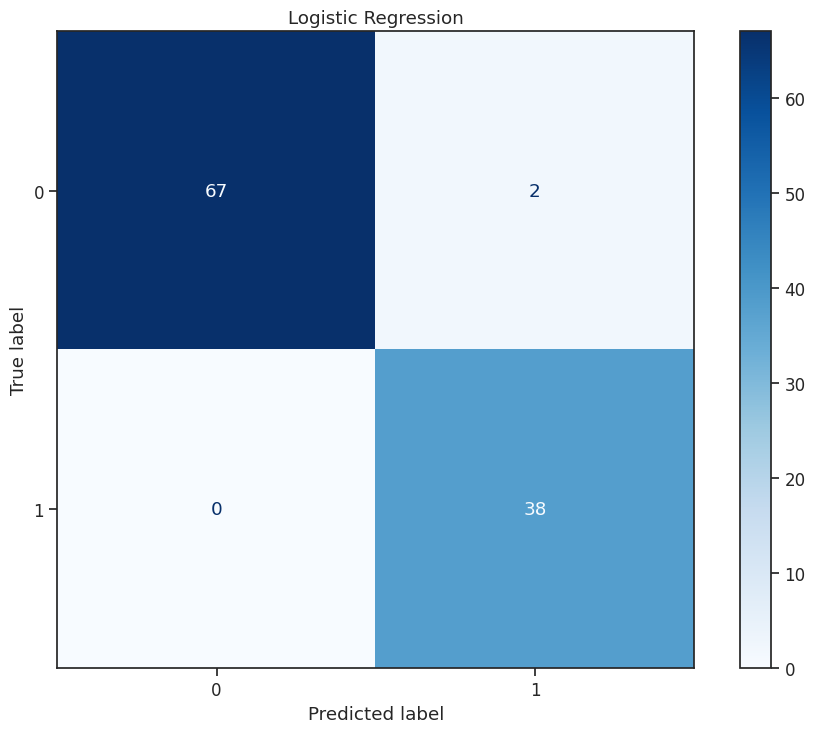

In [159]:
graph[0].plot(cmap='Blues')
plt.title('Logistic Regression')

Text(0.5, 1.0, 'Support Vector Classifier')

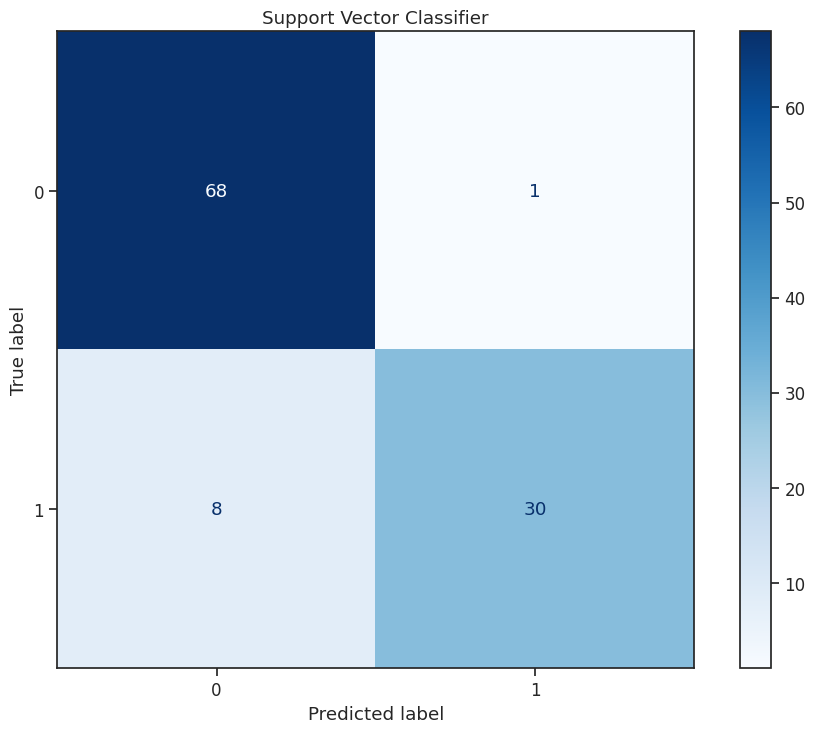

In [160]:
graph[1].plot(cmap='Blues')
plt.title('Support Vector Classifier')

Text(0.5, 1.0, 'Random Forest')

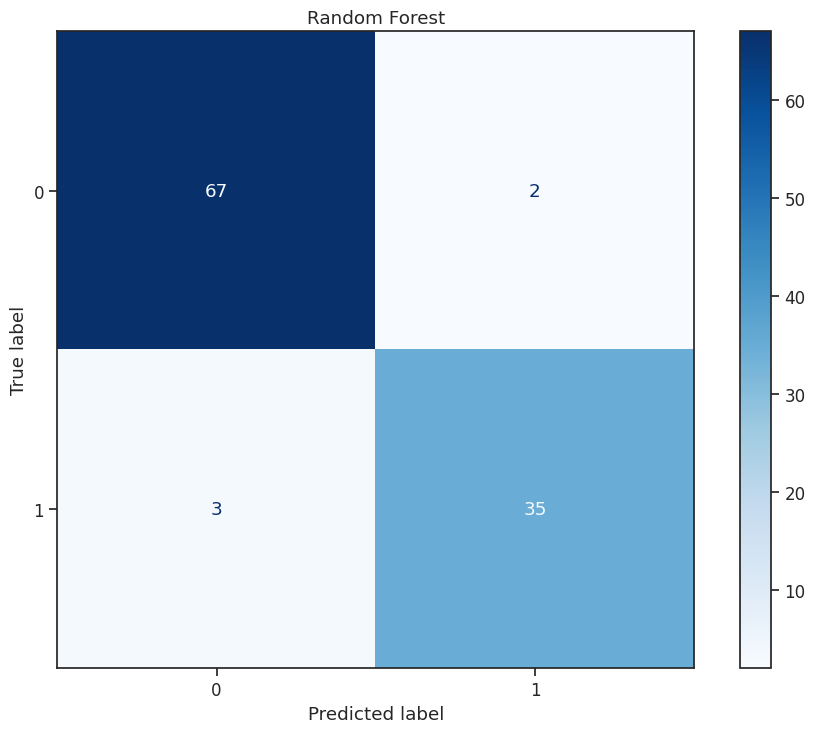

In [161]:
graph[2].plot(cmap='Blues')
plt.title('Random Forest')

Podemos ver que la regresión logística logró acertar todos los diagnósticos salvo 1 falso positivo. El resto de los modelos tuvo igual o mayor cantidad de falsos positivos, pero también presentan verdaderos falsos. Ahora veamos sus curvas AUC-ROC.

In [162]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
y_prob_svc = best_svc.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_svc = auc(fpr_svc, tpr_svc)
roc_auc_rf = auc(fpr_rf, tpr_rf)

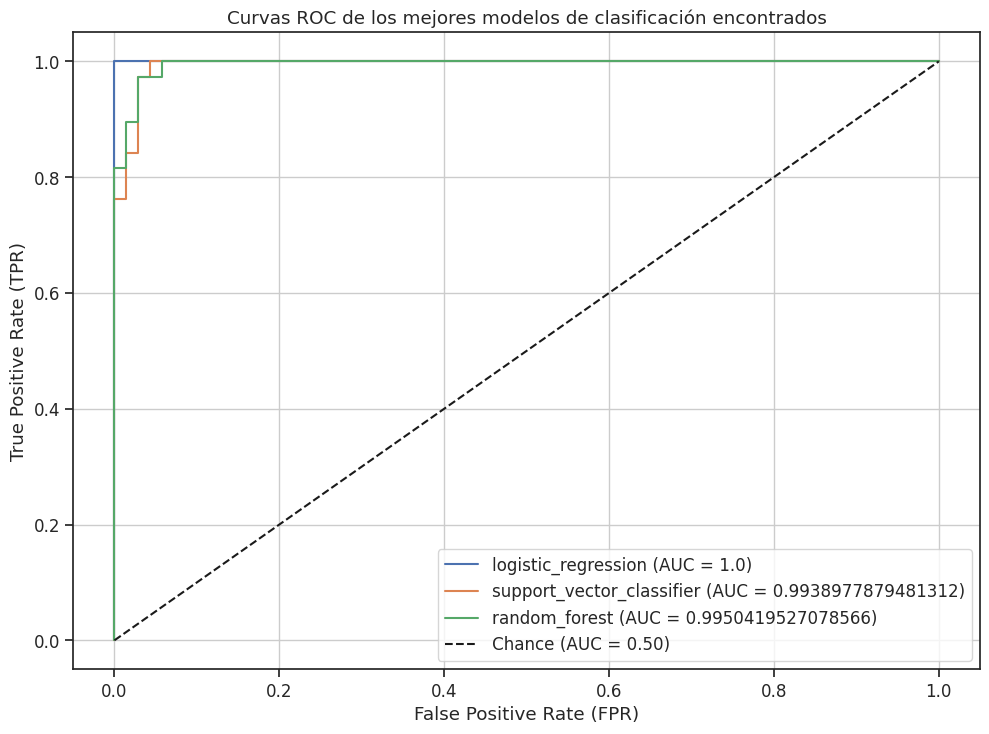

In [163]:
plt.plot(fpr_lr, tpr_lr, label=f'logistic_regression (AUC = {roc_auc_lr})')
plt.plot(fpr_svc, tpr_svc, label=f'support_vector_classifier (AUC = {roc_auc_svc})')
plt.plot(fpr_rf, tpr_rf, label=f'random_forest (AUC = {roc_auc_rf})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curvas ROC de los mejores modelos de clasificación encontrados')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Podemos tambien visualizar como la regresión logística es significativamente mejor que los otros modelos.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



Dado los resultados anteriores, el modelo mas apropiado de los probados anteriormente parece ser la regresión lineal simple, con los hiperparámetros anteriores. Esto se debe a que es mejor en todas las métricas que los otros modelos por un margen bien grande.

El preprocesamiento realizado anteriormente facilita al computador a trabajar con datos estandarizados y con magnitudes relativamente similares. La reducción de dimensionalidad puede empeorar ligeramente el rendimiento, pero facilita el entrenamiento y puede prevenir overfitting de variables no significativas para la clasificación. A pesar de esto, se encontró un modelo muy bueno en métricas que logra acertar con bastante precisión al problema de clasificación pedido.

En un escenario real de diagnóstico médico asistido por machine learning, es muy importante verificar que el modelo tenga la menor cantidad de verdaderos falsos posibles y es probable que se requieran tomar mejores medidas para prevenir la existencia de estos errores. Es mejor asegurar el asegurar poder tratar a una persona que requiere asistencia médica, que el atender a una persona sana.